## <font size=5> <strong>Heart Disease Prediction 
    
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['Untitled10.ipynb', '.Rhistory', 'Untitled7.ipynb', 'monthly_sales.npy', '.config', '.macports', 'transaction-fraud-detection-cycle1.ipynb', 'Music', 'tokenizer.pickle', 'Data_Visualization_with_Matplotlib_exercises_I.ipynb', 'obj', '.condarc', 'dv2.pdf', 'HW1 (1).ipynb', 'Pandas_Foundations_exercises_II.ipynb', 'dv2scatterplot.pdf', 'Untitled12.ipynb', 'Gesture_Controller.ipynb.py', 'Data_Manipulation_with_Pandas_exercises_II.ipynb', 'Untitled5.ipynb', 'fraud_0.1origbase.csv', 'gurobi.ipynb', 'tree_census.npy', 'Untitled1.ipynb', 'install', 'Untitled16.ipynb', '.DS_Store', '.r', 'nltk_data', 'drowsiness detection.py', 'Diamond Price Prediction.ipynb', 'mpi', 'requirements.txt', '.CFUserTextEncoding', 'Supervised_Learning_exercises_I.ipynb', 'bin', '.xonshrc', 'Pandas_Foundations_exercises_III_anand_submitted.ipynb', 'Untitled3.ipynb', 'Untitled14.ipynb', 'chatbot_model.h5', 'DATA3.R', 'labfatdv.R', 'build_opencv', 'Untitled.ipynb', 'Merging_DataFrames_with_Pandas_exercises_I-2.ipynb'

## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [96]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Let's understand our columns better:

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


<AxesSubplot:>

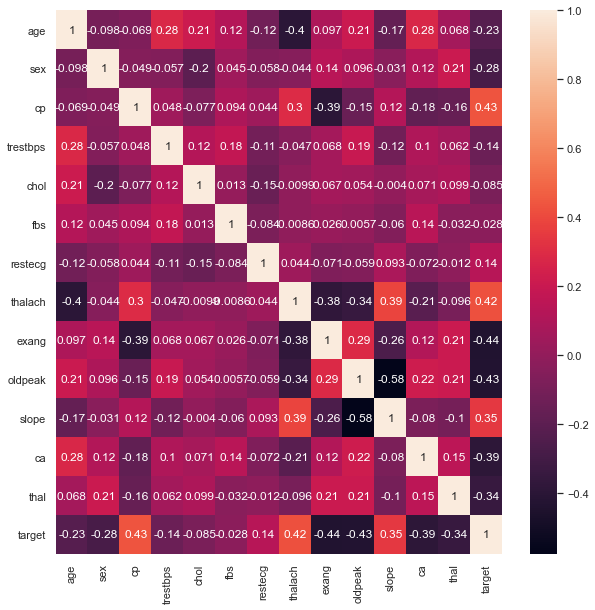

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

In [13]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

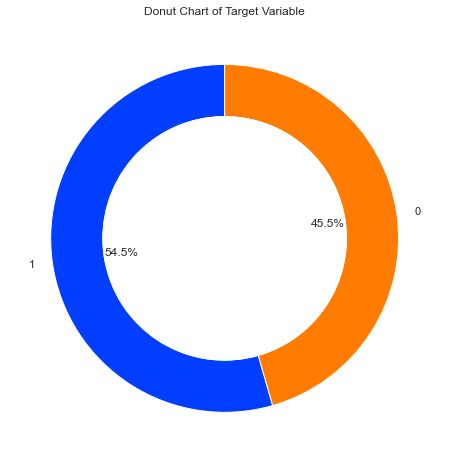

In [103]:
y = dataset["target"]
target_temp = dataset.target.value_counts()

# Create a donut chart
plt.pie(target_temp, labels=target_temp.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3), startangle=90, colors=sns.color_palette('bright'))
plt.gca().add_artist(plt.Circle((0,0),0.7,fc='white'))

# Display the chart
plt.title("Donut Chart of Target Variable")
plt.show()

In [104]:
print("Percentage of patient without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patient with heart problems: "+str(round(target_temp[1]*100/303,2)))



Percentage of patient without heart problems: 45.54
Percentage of patient with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [105]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

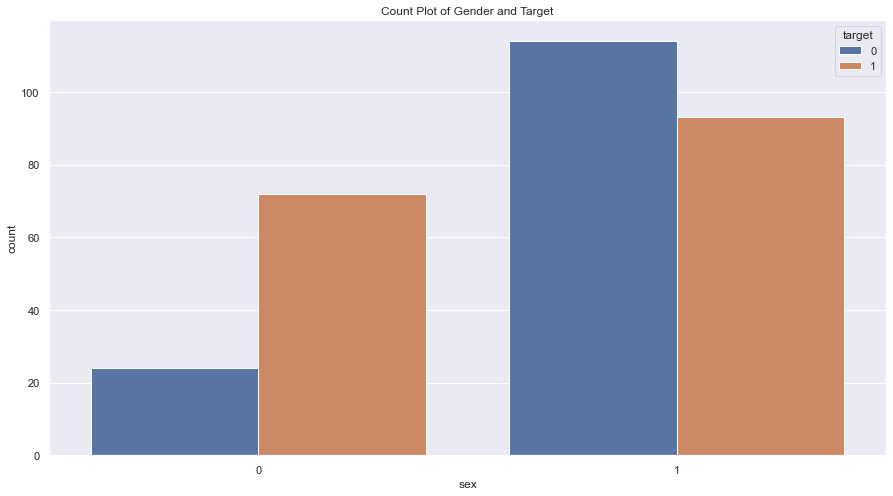

In [107]:
sns.countplot(x='sex', hue='target', data=dataset)

# Display the plot
plt.title("Count Plot of Gender and Target")
plt.show()

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [108]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

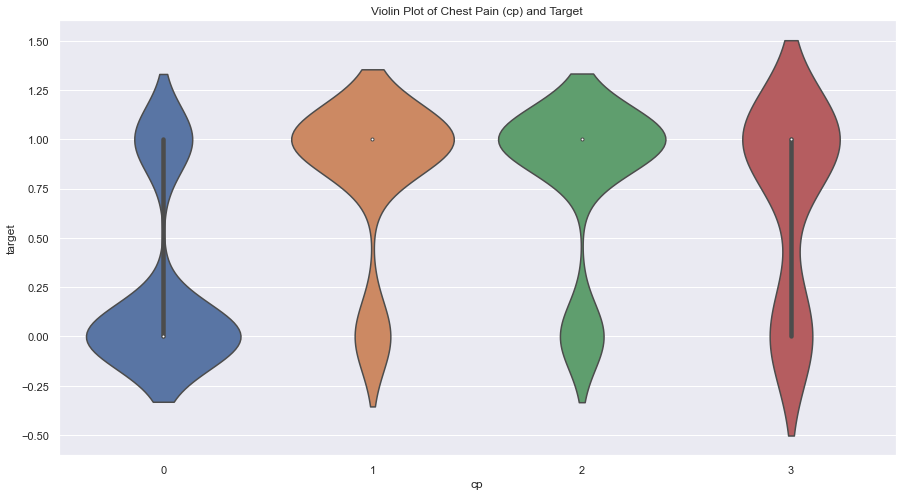

In [110]:
# Assuming 'cp' and 'target' are columns in your dataset
sns.violinplot(x='cp', y='target', data=dataset,colors=sns.color_palette('bright'))

# Display the plot
plt.title("Violin Plot of Chest Pain (cp) and Target")
plt.show()

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [111]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [112]:
dataset["fbs"].unique()

array([1, 0])

<AxesSubplot:xlabel='fbs', ylabel='target'>

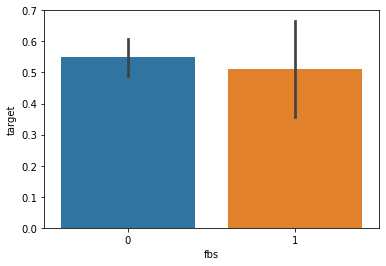

In [22]:
sns.barplot(dataset["fbs"],y)

### Analysing the restecg feature

In [113]:
dataset["restecg"].unique()

array([0, 1, 2])

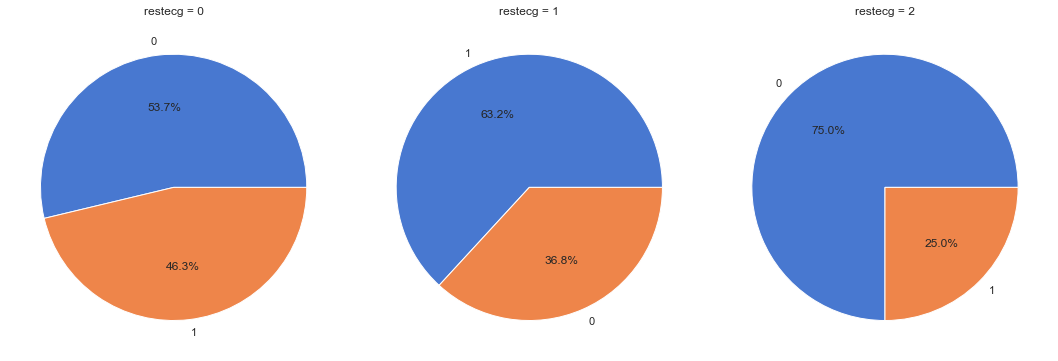

In [118]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over each 'restecg' category
for i, restecg_value in enumerate([0, 1, 2]):
    # Filter data for the current 'restecg' category
    subset_data = dataset[dataset['restecg'] == restecg_value]
    
    # Count the distribution of 'target' in the subset
    target_counts = subset_data['target'].value_counts()
    
    # Plot a pie chart for the current 'restecg' category
    axes[i].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
    axes[i].set_title(f"restecg = {restecg_value}")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [25]:
dataset["exang"].unique()

array([0, 1])

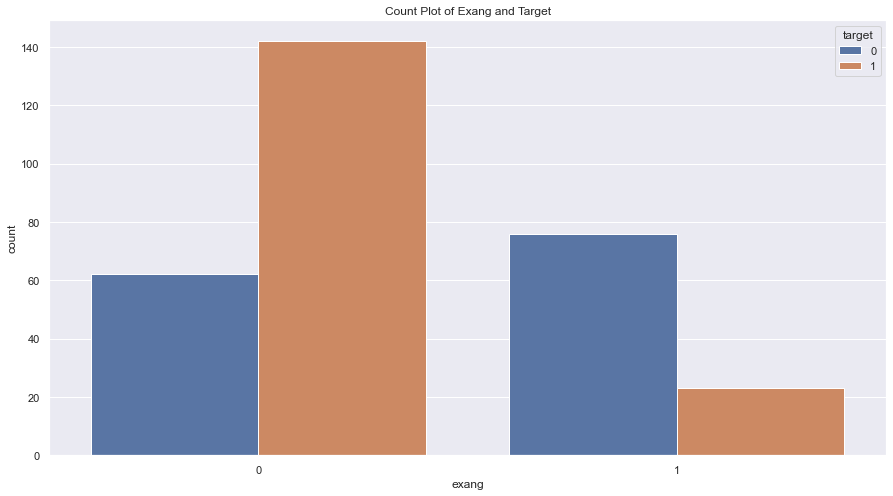

In [119]:
sns.countplot(x='exang', hue='target', data=dataset)

# Display the plot
plt.title("Count Plot of Exang and Target")
plt.show()

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [120]:
dataset["slope"].unique()

array([0, 2, 1])

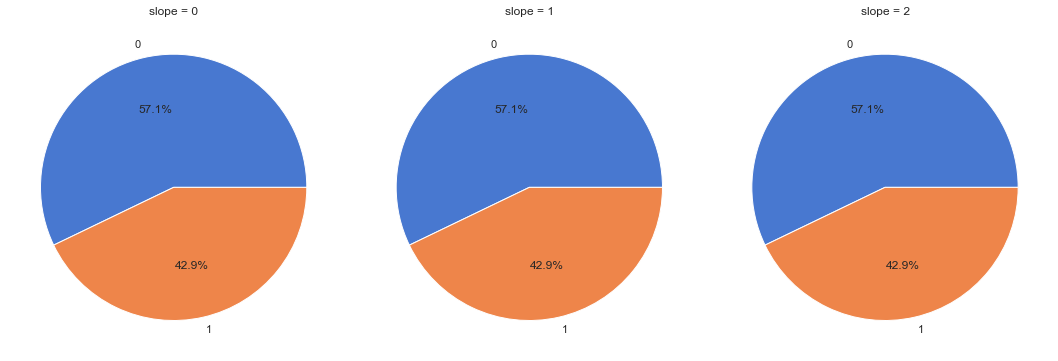

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over each 'restecg' category
for i, slope_value in enumerate([0, 1, 2]):
    # Filter data for the current 'restecg' category
    subset_data = dataset[dataset['slope'] == restecg_value]
    
    # Count the distribution of 'target' in the subset
    target_counts = subset_data['target'].value_counts()
    
    # Plot a pie chart for the current 'restecg' category
    axes[i].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
    axes[i].set_title(f"slope = {slope_value}")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [123]:
#number of major vessels (0-3) colored by flourosopy

In [30]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<AxesSubplot:xlabel='ca', ylabel='count'>

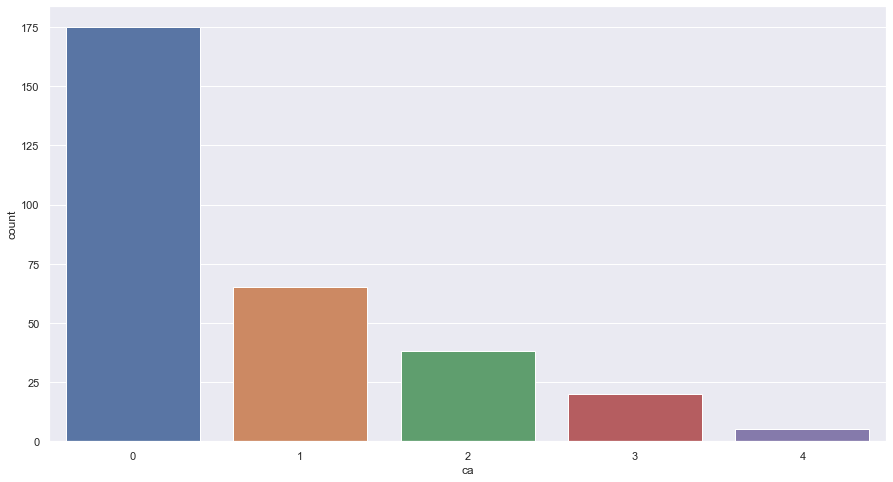

In [124]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

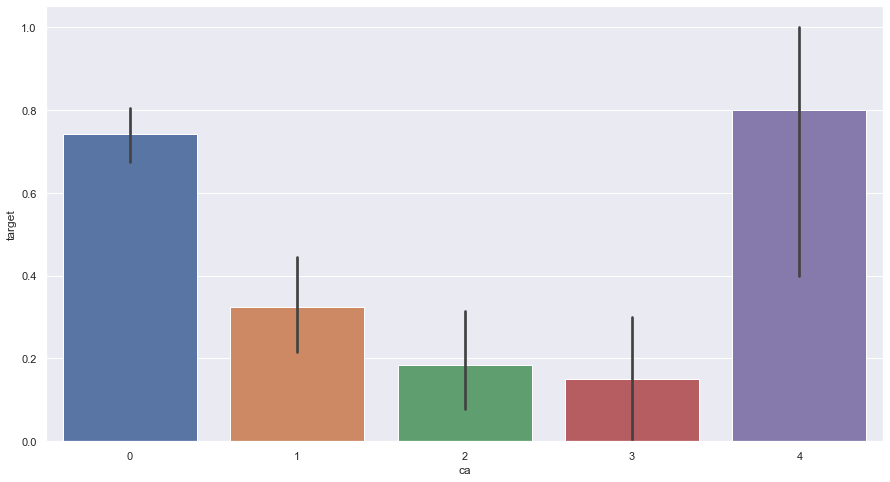

In [125]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [126]:
### Analysing the 'thal' feature

In [127]:
dataset["thal"].unique()

array([1, 2, 3, 0])

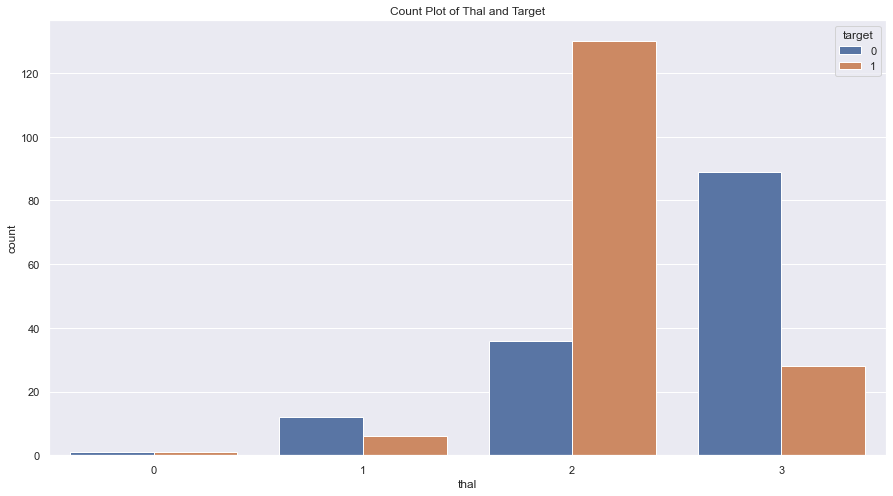

In [129]:
sns.countplot(x='thal', hue='target', data=dataset)

# Display the plot
plt.title("Count Plot of Thal and Target")
plt.show()

<AxesSubplot:xlabel='thal', ylabel='Density'>

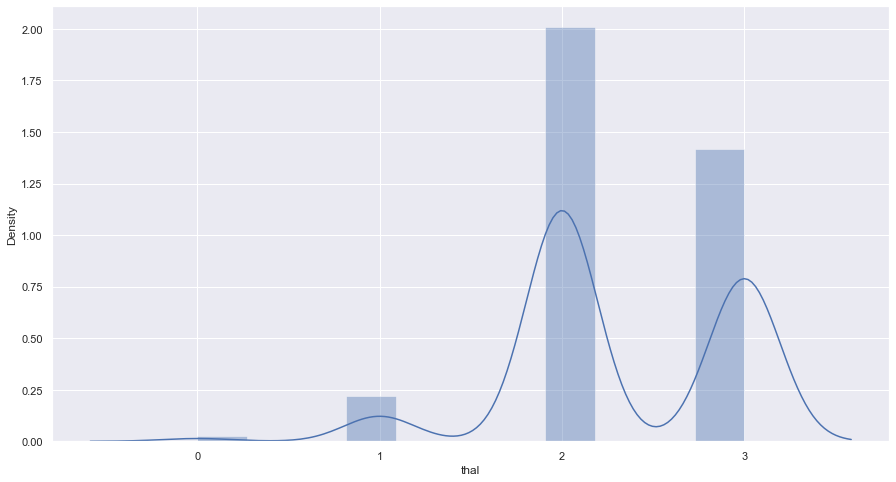

In [130]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [37]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [38]:
X_train.shape

(242, 13)

In [39]:
X_test.shape

(61, 13)

In [40]:
Y_train.shape

(242,)

In [41]:
Y_test.shape

(61,)

## V. Model Fitting

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [67]:
Y_pred_lr.shape

(61,)

In [69]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

recall_lr=round(recall_score(Y_pred_lr,Y_test)*100,2)
print("The recall achieved using Logistic Regression is: "+str(recall_lr)+" %")

f1_lr=2 * (score_lr * recall_lr) / (score_lr + recall_lr)
print("The f1 achieved using Logistic Regression is: "+str(f1_lr)+" %")




The accuracy score achieved using Logistic Regression is: 85.25 %
The recall achieved using Logistic Regression is: 85.71 %
The f1 achieved using Logistic Regression is: 85.47938114178756 %


### Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [71]:
Y_pred_nb.shape

(61,)

In [84]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

recall_nb=round(recall_score(Y_pred_nb,Y_test)*100,2)
print("The recall achieved using Naive Bayes is: "+str(recall_nb)+" %")

f1_nb=2 * (score_nb * recall_nb) / (score_nb + recall_nb)
print("The f1 achieved using Naive Bayes is: "+str(f1_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %
The recall achieved using Naive Bayes is: 83.78 %
The f1 achieved using Naive Bayes is: 84.50860793941904 %


### SVM

In [73]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [74]:
Y_pred_svm.shape

(61,)

In [85]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

recall_svm=round(recall_score(Y_pred_svm,Y_test)*100,2)
print("The recall achieved using Linear SVM is: "+str(recall_svm)+" %")

f1_svm=2 * (score_svm * recall_svm) / (score_svm + recall_svm)
print("The f1 achieved using  Linear SVM is: "+str(f1_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %
The recall achieved using Linear SVM is: 81.08 %
The f1 achieved using  Linear SVM is: 81.5225709904937 %


### K Nearest Neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [80]:
Y_pred_knn.shape

(61,)

In [82]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

recall_knn=round(recall_score(Y_pred_knn,Y_test)*100,2)
print("The recall achieved using KNN is: "+str(recall_knn)+" %")

f1_knn=2 * (score_knn * recall_knn) / (score_knn + recall_knn)
print("The f1 achieved using KNN is: "+str(f1_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %
The recall achieved using KNN is: 71.88 %
The f1 achieved using KNN is: 69.46660148105543 %


### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [87]:
print(Y_pred_dt.shape)

(61,)


In [89]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

recall_dt=round(recall_score(Y_pred_dt,Y_test)*100,2)
print("The recall achieved using KNN is: "+str(recall_dt)+" %")

f1_dt=2 * (score_dt * recall_dt) / (score_dt + recall_dt)
print("The f1 achieved using Decision Tree is: "+str(f1_dt)+" %")


The accuracy score achieved using Decision Tree is: 81.97 %
The recall achieved using KNN is: 84.85 %
The f1 achieved using Decision Tree is: 83.38513967150222 %


### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)



In [91]:
y_pred.shape

(61,)

In [93]:
from sklearn import metrics
#Model Accuracy, how often is the classifier correct?
score_rf = round(accuracy_score(y_pred,Y_test)*100,2)
print("The accuracy achieved using Random Forest is: "+str(score_rf)+" %")
recall_rf=round(recall_score(y_pred,Y_test)*100,2)
print("The recall achieved using Random Forest is: "+str(recall_rf)+" %")

f1_rf=2 * (score_rf * recall_rf) / (score_rf + recall_rf)
print("The f1 achieved using Random Forest is: "+str(f1_rf)+" %")

The accuracy achieved using Random Forest is: 83.61 %
The recall achieved using Random Forest is: 87.5 %
The f1 achieved using Random Forest is: 85.51078253754893 %


## VI. Output final score

In [94]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 83.61 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

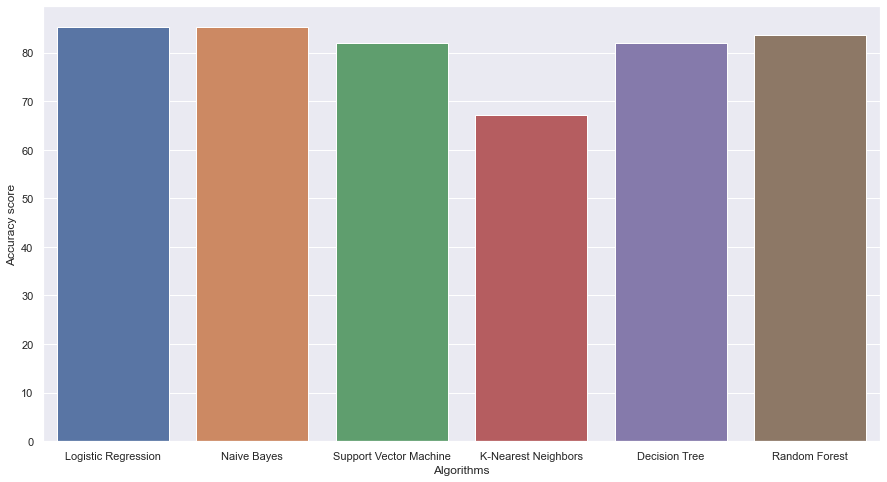

In [95]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## ROC CURVE